# Homework 3

In [11]:
import numpy as np
import matplotlib.pylab as plt

## Optimization with Gradient Descent

In [12]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [13]:
# Gradient Descent implementation
def GD(f, grad_f, x0, tolf, tolx, kmax, use_backtraking=True, a=0.2):
    # As output, we want:
    # x -> The stationary point
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of ||grad_f(x_k)||

    f_val = [f(x0)]
    err_val = [np.linalg.norm(grad_f(x0))]
    alpha = backtracking(f, grad_f, x0) if use_backtraking else a
    
    # Init iteration
    k = 0
    x = [x0]
    
    rel_tol_cond = True
    rel_inp_cond = True
    max_it_cond = True
    
    while rel_tol_cond and rel_inp_cond and max_it_cond:
        x.append(x[k] - alpha * grad_f(x[k]))
        f_val.append(f(x[k+1]))
        err_val.append(np.linalg.norm(grad_f(x[k])))
        
        # Update alpha and k
        if use_backtraking:
            alpha = backtracking(f, grad_f, x[k+1])
        k += 1
        
        rel_tol_cond = np.linalg.norm(grad_f(x[k-1])) >= tolf * np.linalg.norm(grad_f(x0))
        # We skip the first iteration
        rel_inp_cond = np.linalg.norm(x[k] - x[k-1]) >= tolx
        max_it_cond = k < kmax

    return x[k], np.array(f_val), np.array(err_val), x, k

Define a function to analyze the behavior of GD

In [14]:
def analyze_GD_methods(f, grad_f, x_0, kmax=100, alpha1=0.1, alpha2=0.05, x_true=None, contour_range=None):
    def plot_error(errors, fun_labels, x_label, y_label, title):
        for error, label in zip(errors, fun_labels):
            plt.plot(error, label = label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.legend()
        plt.show()
        return

    # Use GD with backtraking
    res_back = GD(f, grad_f, x_0, 0.001, 0.001, kmax)
    x_b, f_b, err_b, xs_b, k_b = res_back

    # Use GD without backtraking and alpha2
    res_no_back1 = GD(f, grad_f, x_0, 0.001, 0.001, kmax, use_backtraking=False, a=alpha1)
    x_nb1, f_nb1, err_nb1, xs_nb1, k_nb1 = res_no_back1

    # Use GD without backtraking and alpha2
    res_no_back2 = GD(f, grad_f, x_0, 0.001, 0.001, kmax, use_backtraking=False, a=alpha2)
    x_nb2, f_nb2, err_nb2, xs_nb2, k_nb2 = res_no_back2

    plot_error([err_b, err_nb1, err_nb2], ["Backtraking", f"alpha={alpha1}", f"alpha={alpha2}"],
                "iterations", "gradient error", "Convergence speed")

    print(f"Solutions:\n Backtraking : {x_b}\n Alpha={alpha1} : {x_nb1}\n Alpha={alpha2} : {x_nb2}")
    if x_true is not None:
        print(f"True solution: {x_true}")
        # Plot the error between the computed solution and the true one
        xs_errors = []
        for xs in [xs_b, xs_nb1, xs_nb2]:
            xs_errors.append(np.linalg.norm(xs - x_true, axis=1))
        plot_error(xs_errors, ["Backtraking", f"alpha={alpha1}", f"alpha={alpha2}"],
                    "iterations", "$x_k - x_{true}$", "Relative error")

    if contour_range is not None:
        xs = np.array(xs_b)
        rx, ry = contour_range
        # Plot the contour curve
        ## Create the grid
        xv = np.linspace(rx[0], rx[1], 100)
        yv = np.linspace(rx[0], ry[1], 100)
        xx, yy = np.meshgrid(xv, yv)
        ## Compute the function
        zz = np.array([f(np.array([x, y])) for x,y in zip(xx, yy)])

        cp = plt.contourf(xx, yy, zz)
        plt.colorbar(cp)
        plt.plot(xs[:, 0], xs[:, 1], "o-", c="white")
        plt.show()

Analyze the function $f(x_1, x_2) = (x_1-3)^2 + (x_2 - 1)^2$

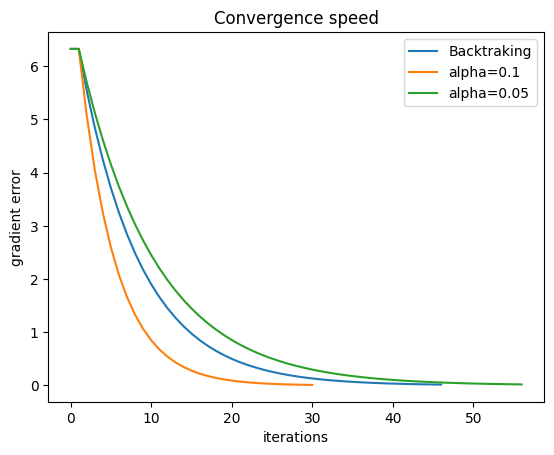

Solutions:
 Backtraking : [2.99355101 0.99785034]
 Alpha=0.1 : [2.99628618 0.99876206]
 Alpha=0.05 : [2.99178322 0.99726107]
True solution: [3 1]


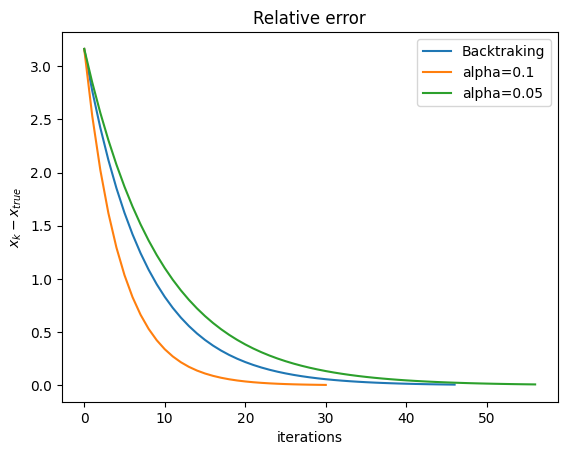

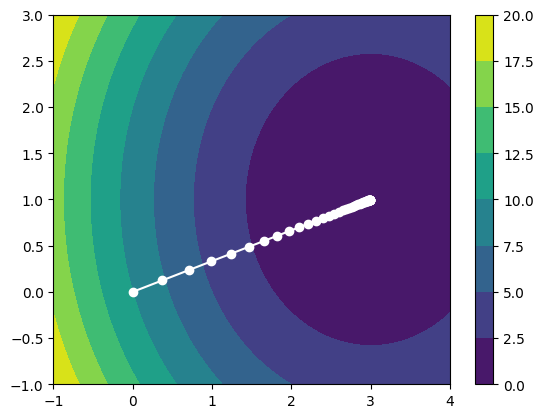

In [15]:
# define the function
def f_1(x):
    return (x[0] - 3)**2 + (x[1] - 1)**2

# define the gradient
def grad_f_1(x):
    return np.array([2*(x[0]-3), 2*(x[1]-1)])

# Define the true solution
x_true = np.array([3, 1])

# Analyze GD
analyze_GD_methods(f_1, grad_f_1, np.array([0,0]), x_true=x_true, contour_range=((-1, 4),(-2, 3)))

Analyze the function $f(x_1, x_2) = 10(x_1 - 1)^2 + (x_2 - 2)^2$

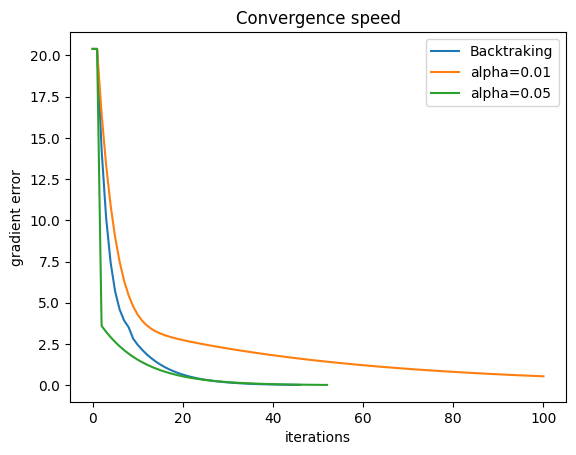

Solutions:
 Backtraking : [1.        1.9912335]
 Alpha=0.01 : [1.         1.73476089]
 Alpha=0.05 : [1.         1.99165088]
True solution: [1 2]


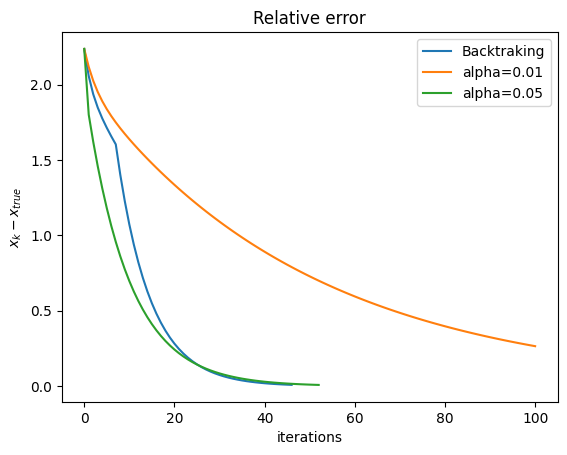

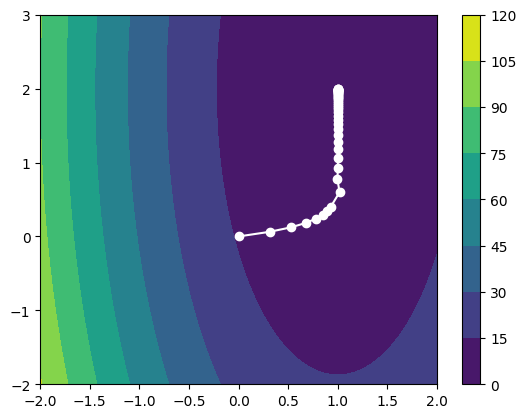

In [16]:
# define the function
def f_2(x):
    return 10*(x[0] - 1)**2 + (x[1] - 2)**2

# define the gradient
def grad_f_2(x):
    return np.array([20*(x[0]-1), 2*(x[1]-2)])

# Define the true solution
x_true = np.array([1, 2])

# Analyze GD
analyze_GD_methods(f_2, grad_f_2, np.array([0,0]), x_true=x_true, alpha1=0.01, contour_range=((-2, 2), (-1, 3)))

Analyze the function $f(x)=\frac{1}{2}\|Ax-b\|_2^2$

==> Analysis with n=5


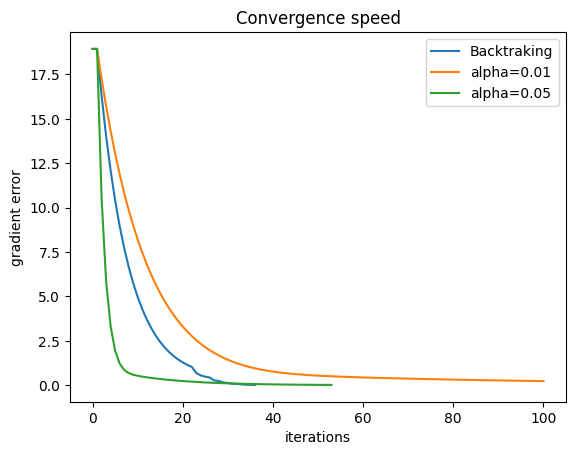

Solutions:
 Backtraking : [[0.94540853]
 [0.97637399]
 [1.0161571 ]
 [1.06134886]
 [0.98745695]]
 Alpha=0.01 : [[0.87494211]
 [0.91333192]
 [0.96730598]
 [1.04346111]
 [1.08344022]]
 Alpha=0.05 : [[0.94382159]
 [0.97474306]
 [1.01453009]
 [1.05994975]
 [0.98983793]]
==> Analysis with n=10


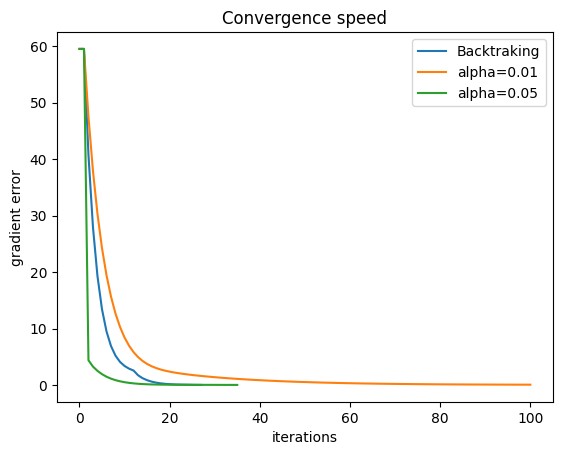

Solutions:
 Backtraking : [[0.9416381 ]
 [0.95489584]
 [0.96966714]
 [0.98592099]
 [1.00338816]
 [1.02126535]
 [1.03751599]
 [1.04705968]
 [1.03642111]
 [0.97094196]]
 Alpha=0.01 : [[0.91451521]
 [0.93084711]
 [0.9495058 ]
 [0.97074569]
 [0.99470322]
 [1.02114135]
 [1.04873318]
 [1.07279626]
 [1.07659429]
 [0.95698506]]
 Alpha=0.05 : [[0.93706666]
 [0.95090131]
 [0.9664    ]
 [0.98358352]
 [1.00225547]
 [1.02171208]
 [1.04003506]
 [1.05218019]
 [1.0439367 ]
 [0.9669349 ]]
==> Analysis with n=15


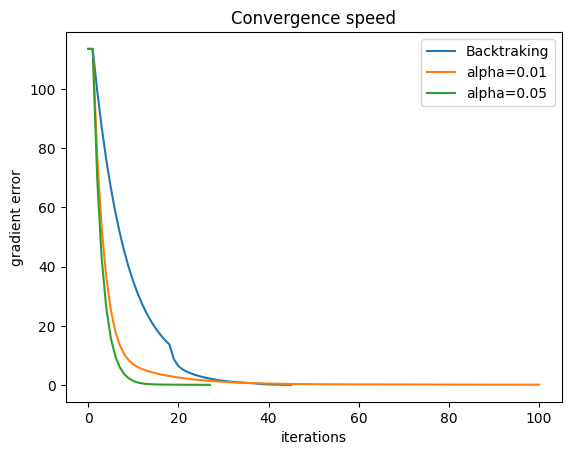

Solutions:
 Backtraking : [[0.94884171]
 [0.95699332]
 [0.96567657]
 [0.97487228]
 [0.98452782]
 [0.9945366 ]
 [1.00470482]
 [1.01469628]
 [1.02393847]
 [1.03145929]
 [1.03559772]
 [1.03349884]
 [1.02038544]
 [0.99015373]
 [0.98508157]]
 Alpha=0.01 : [[0.9279305 ]
 [0.93743727]
 [0.94770352]
 [0.9587603 ]
 [0.97061892]
 [0.98325481]
 [0.99657981]
 [1.01039344]
 [1.02429483]
 [1.0375174 ]
 [1.04860345]
 [1.05472614]
 [1.05018763]
 [1.0230104 ]
 [0.95972396]]
 Alpha=0.05 : [[0.94225839]
 [0.95082258]
 [0.95998835]
 [0.96975206]
 [0.98008094]
 [0.99089393]
 [1.00203026]
 [1.01319634]
 [1.02387402]
 [1.03315713]
 [1.0394522 ]
 [1.03992247]
 [1.02952637]
 [1.0003888 ]
 [0.97756261]]


In [17]:
# This function helps us compute A and b for the f_3 function
def get_f_3_components(x):
    # Assume x is column vector
    N, _ = x.shape
    # We define A as:
    A = np.vander(np.linspace(0, 1, num=N))
    
    # We define b as
    x_true = np.ones(N)
    b = (A @ x_true).reshape((-1, 1))
    return A, b

def f_3(x):
    A, b = get_f_3_components(x)
    return 0.5 * np.linalg.norm(A @ x - b)**2

def grad_f_3(x):
    A, b = get_f_3_components(x)
    return A.T @ (A @ x - b) # TODO chiedere al prof se è così che si fa

for n in range(5, 16, 5):
    print(f"==> Analysis with n={n}")
    analyze_GD_methods(f_3, grad_f_3, np.array([0 for i in range(n)]).reshape(-1 ,1), alpha1=0.01)


Analyze the function $f(x)=\frac{1}{2}\|Ax-b\|_2^2 - \frac{\lambda}{2}\|x\|^2_2$

==> Analysis with lambda=0.1


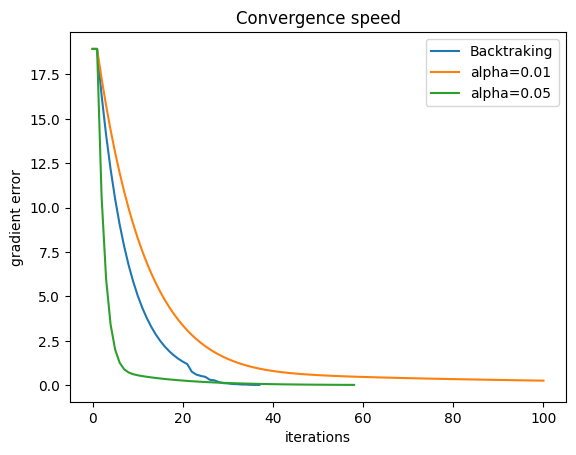

Solutions:
 Backtraking : [[0.97725086]
 [1.00588477]
 [1.04118203]
 [1.07658985]
 [0.97039747]]
 Alpha=0.01 : [[0.89164869]
 [0.92999396]
 [0.9835514 ]
 [1.05804492]
 [1.08527054]]
 Alpha=0.05 : [[0.97570303]
 [1.00437414]
 [1.03980915]
 [1.07568624]
 [0.97359901]]
==> Analysis with lambda=0.5


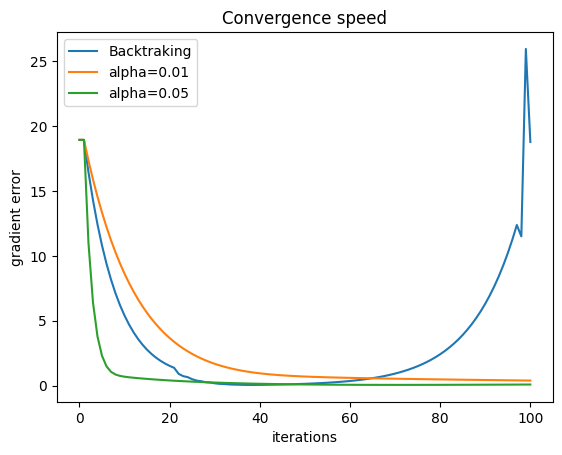

Solutions:
 Backtraking : [[ 22.95333169]
 [ 12.07585036]
 [ -4.52631905]
 [-30.29374281]
 [  8.75511834]]
 Alpha=0.01 : [[0.96627621]
 [1.00415441]
 [1.05535448]
 [1.12136456]
 [1.08713314]]
 Alpha=0.05 : [[1.21090725]
 [1.19752493]
 [1.1626367 ]
 [1.07069364]
 [0.86780501]]
==> Analysis with lambda=0.7


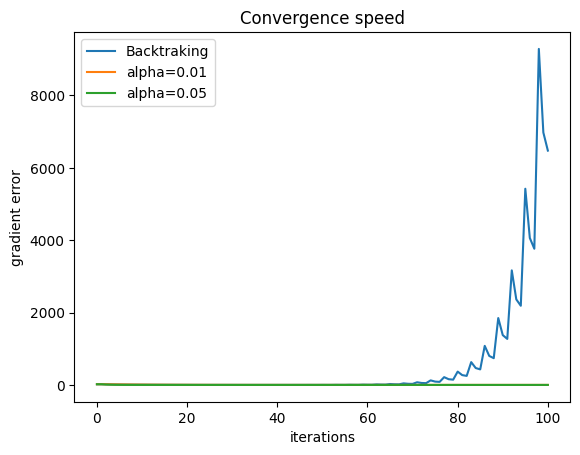

Solutions:
 Backtraking : [[  9409.79689586]
 [  4985.56490951]
 [ -1722.48951263]
 [-12003.370013  ]
 [  4414.14702596]]
 Alpha=0.01 : [[1.00899849]
 [1.04643066]
 [1.09595068]
 [1.15639791]
 [1.08400264]]
 Alpha=0.05 : [[1.41895776]
 [1.3577197 ]
 [1.24454784]
 [1.01512458]
 [0.77485031]]


In [18]:
def get_f_4(lamb):
    def f_4(x):
        return f_3(x) - lamb/2 * (np.linalg.norm(x)**2)

    def grad_f_4(x):
        return grad_f_3(x) - lamb * x
    return f_4, grad_f_4

n = 5
for l in [0.1, 0.5, 0.7]:
    print(f"==> Analysis with lambda={l}")
    f_4, grad_f_4 = get_f_4(l)
    analyze_GD_methods(f_4, grad_f_4, np.array([0 for i in range(n)]).reshape(-1 ,1), alpha1=0.01)


Analyze the function $f(x)=x^4 + x^3 -2x^2 -2x$

==> Starting point is -3


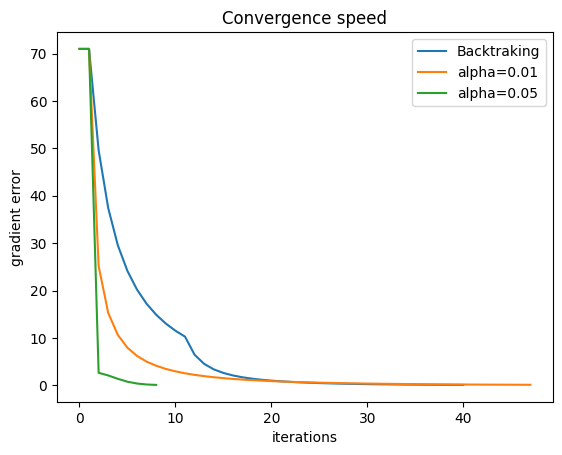

Solutions:
 Backtraking : [-1.24132982]
 Alpha=0.01 : [-1.24484408]
 Alpha=0.05 : [0.91976175]
==> Starting point is 0


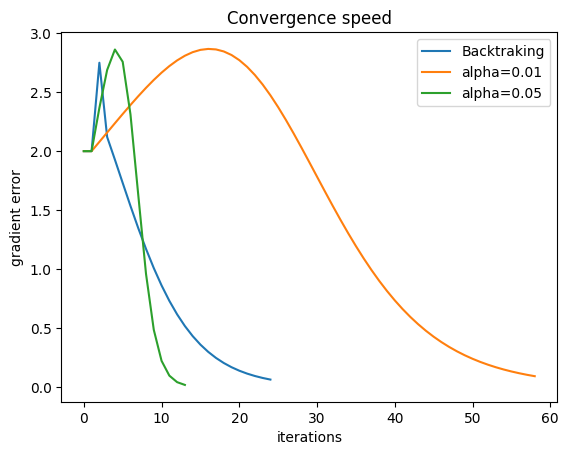

Solutions:
 Backtraking : [0.91786809]
 Alpha=0.01 : [0.91532447]
 Alpha=0.05 : [0.92163279]


In [19]:
def f_5(x):
    return x**4 + x**3 + -2*x**2 -2*x

def grad_f_5(x):
    return 4*x**3 + 3*x**2 + -4*x -2

print("==> Starting point is -3")
analyze_GD_methods(f_5, grad_f_5, np.array([-3]), alpha1=0.01)
print("==> Starting point is 0")
analyze_GD_methods(f_5, grad_f_5, np.array([0]), alpha1=0.01)


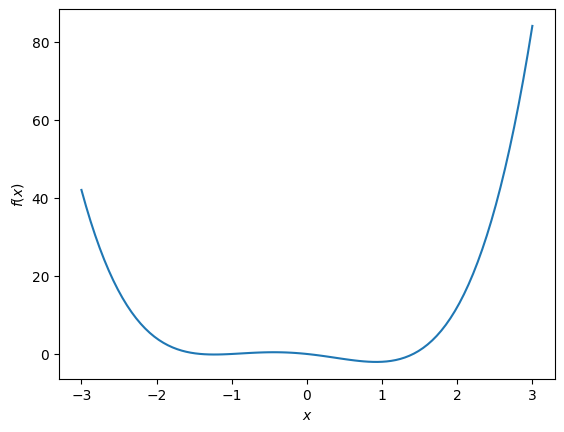

In [20]:
# Plot the function in [-3, 3]
xs = np.linspace(-3, 3, 100)
plt.plot(xs, [f_5(x) for x in xs])
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()